## 0 - Import and Load

This Notebook has been prepared for running the linear regression over the first period. Very close to Linear regression V3, we chose to create a second one for two reasons :
- Some headers are different
- We wanted to be able to work on both periods simultaneously 

The structure of the file is the following.
- Import
- Filtering and Preprocessing ( 3 different versions)
- OLS Baseline
- OLS With Standardization
- OLS W. Normalization
- OLS Using RFE Features
- Visualisation

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [142]:
extractions = SP_path + 'Extractions_folder/'
df = pd.read_csv(extractions + 'Run_November_04_40_21Last_DAY_16_.csv')

/Users/abdeslamguessous/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,12,13,14,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [143]:
len(df)

295708

In [144]:
len(df.author_id.unique())

63227

In [145]:
SP_path = '/Users/abdeslamguessous/Documents/GitHub/SemesterProject/'
PE_path = SP_path + 'ProcessEntropy-master/'
dependancies = PE_path + 'Pycharm_files_V1/'
results_path = PE_path + 'Results_V1/'
users = pd.read_csv(PE_path + 'Users_with_features.csv')

results_with_users = pd.read_csv(PE_path + 'results_with_users_V2.csv')
results_with_users.drop('Unnamed: 0', axis=1, inplace=True)
results_with_users.set_index('Key',inplace=True)

In [146]:
len(results_with_users.source.unique())

254

In [136]:
df = results_with_users

In [137]:
len(df)

64262

In [132]:
len(df.columns) , df.columns

(35,
 Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
        'selfEntropyT', 'selfEntropyS', 'username_source',
        'author_followers_source', 'author_tweets_source',
        'author_following_source', 'author_listed_source',
        'author_description_source', 'author_location_source',
        'author_private_source', 'author_verified_source',
        'author_account_creation_source', 'Year_creation_source',
        'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
        'username_target', 'author_followers_target', 'author_tweets_target',
        'author_following_target', 'author_listed_target',
        'author_description_target', 'author_location_target',
        'author_private_target', 'author_verified_target',
        'author_account_creation_target', 'Year_creation_target',
        'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
       dtype='object'))

In [78]:
df.describe()

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,author_followers_source,author_tweets_source,author_following_source,...,FF_Ratio_source,TweetsNb_source_users,author_followers_target,author_tweets_target,author_following_target,author_listed_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
count,6.426200e+04,6.426200e+04,6.426200e+04,64262.000000,64262.000000,64262.000000,64262.000000,6.426200e+04,6.426200e+04,64262.000000,...,64262.000000,64262.000000,6.426200e+04,6.426200e+04,64262.000000,64262.000000,64262.000000,64262.000000,64262.000000,64262.000000
mean,9.783246e+17,9.783246e+17,3.577023e-16,5.832722,5.832722,3.840735,3.840735,2.661176e+04,5.443447e+04,1234.448819,...,102.518614,13.661417,2.661176e+04,5.443447e+04,1234.448819,264.051181,2018.102362,0.682666,102.518614,13.661417
std,5.295323e+17,5.295323e+17,1.169073e+01,1.227834,1.227834,1.584400,1.584400,1.478438e+05,1.349390e+05,3153.966188,...,377.423864,27.906901,1.478438e+05,1.349390e+05,3153.966188,1155.984586,3.539089,0.286995,377.423864,27.906901
min,2.078065e+07,2.078065e+07,-1.945374e+02,0.284509,0.284509,0.050716,0.050716,3.000000e+00,1.290000e+02,0.000000,...,-1.000000,3.000000,3.000000e+00,1.290000e+02,0.000000,0.000000,2009.000000,0.025316,-1.000000,3.000000
25%,8.848383e+17,8.848383e+17,-6.215404e-01,5.133482,5.133482,2.659907,2.659907,2.160000e+02,4.761000e+03,58.000000,...,0.746141,4.000000,2.160000e+02,4.761000e+03,58.000000,5.000000,2017.000000,0.453333,0.746141,4.000000
50%,1.215087e+18,1.215087e+18,0.000000e+00,5.805427,5.805427,4.466086,4.466086,1.148500e+03,1.488100e+04,278.000000,...,2.359337,5.000000,1.148500e+03,1.488100e+04,278.000000,15.000000,2020.000000,0.756431,2.359337,5.000000
75%,1.376258e+18,1.376258e+18,6.215404e-01,6.485993,6.485993,5.094829,5.094829,4.519000e+03,4.044500e+04,1117.000000,...,19.000000,11.000000,4.519000e+03,4.044500e+04,1117.000000,62.000000,2021.000000,0.964286,19.000000,11.000000
max,1.455248e+18,1.455248e+18,1.945374e+02,11.811069,11.811069,5.935425,5.935425,1.825978e+06,1.336245e+06,40235.000000,...,2923.666667,306.000000,1.825978e+06,1.336245e+06,40235.000000,14091.000000,2021.000000,1.000000,2923.666667,306.000000


For example, the author_following_target and Retweets_Avg_target fields have completely different orders of magnitude, with an average for the first one in the 10^3, and an average for the other around 10^0. If no rescaling technique is applied, feature X1 will inevitably have much more impact on the model than feature X2, whereas feature X2 could be much more relevant. 

In [79]:
features = ['username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',  'FF_Ratio_source','TweetsNb_source_users', 
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target', 'FF_Ratio_target', 'TweetsNb_source_target', 'flow']

In [80]:
len(df[df['flow']>1])/len(df[df['flow']>0])

0.382092060626809

In [81]:
df.head(1)

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
Key,,,,,,,,,,,,,,,,,,,,,
1252722861002813440 - 1278448045974261763,1252722861002813440,1278448045974261763,-0.354528,5.018599,5.727837,5.258726,4.376186,SmartCryptoNew1,59542,13374.0,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3


In [82]:
df[df['source'] ==1278448045974261763 ].selfEntropyS.unique()

array([5.25872636])

### Ajustment du sens du flow

In [83]:
df['flow']=-df['flow']

In [84]:
df.head(2)

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
Key,,,,,,,,,,,,,,,,,,,,,
1252722861002813440 - 1278448045974261763,1252722861002813440,1278448045974261763,0.354528,5.018599,5.727837,5.258726,4.376186,SmartCryptoNew1,59542,13374.0,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
441047175 - 1278448045974261763,441047175,1278448045974261763,0.216983,6.162391,5.034185,5.258726,3.624782,crypt_planet,1374,3155.0,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3


In [85]:
df_back_up = df

### 0-b - Tobbin Filtering

In [2106]:
df = df_back_up

In [2107]:
percentile_high = df.flow.quantile(0.95) # 10th percentile
percentile_high

5.026071162734409

In [2108]:
df = df[df['flow']<percentile_high]

In [2109]:
df = df[df['flow']>0]


In [2110]:
df_back_up = df

In [2111]:
len(df)

35658

### 0-c Aya's Filtering

In [86]:
lst =[1385205739640131584,
 1234489772183343104,
 408382525,
 230190058,
 1143396858208800768,
 3240197969,
 188251389,
 904540565307617280,
 988869330,
 125922216,
 1382981076251971584,
 965548724247191552,
 1408890653887586306,
 1347927540988571649,
 1373262453161799686,
 781471603662196736,
 1455248470776877064,
 1355566985845694468,
 1057622011395084289,
 1262806249164255232,
 410377944,
 28803148,
 1436903038069903364,
 1410288349076721675,
 1413540569444356101,
 1405131947790290947,
 4727914933,
 1247885277374251009,
 1192824698024927233,
 38448943,
 1299632796844077057,
 1112983458433781761,
 2892043241,
 1174914666587250688,
 986040298462728193,
 38152701] 

In [87]:
len(lst)

36

In [88]:
len(df)

64262

In [89]:
df_filter = df

In [90]:
df_filter = df_filter[~df_filter['target'].isin(lst)]

In [91]:
df_filter = df_filter[~df_filter['source'].isin(lst)]

In [92]:
df_filter = df_filter[df_filter['flow']>0]

In [93]:
df_filter.flow.max()

6.356904878048903

In [94]:
df_filter.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [95]:
len(df_filter)

24310

In [96]:
df_back_up = df_filter

### 1 - OLS Baseline

In [97]:
df = df_back_up

In [98]:
df.flow.max()

6.356904878048903

In [99]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [100]:
## Code for V0 - Tweets of Days 1-2

mod = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + TweetsNb_source_users + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_source_target + selfEntropyS + selfEntropyT', data = df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2569.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:55:56   Log-Likelihood:                -16069.
No. Observations:               24310   AIC:                         3.217e+04
Df Residuals:                   24295   BIC:                         3.229e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 2- OLS With Standardization

In [101]:
dfs = df_back_up

In [102]:
dfs.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [103]:
num_features = [ 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       
        'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target']



In [104]:
for col in num_features:
    dfs[col] = (dfs[col]- dfs[col].mean())/dfs[col].std()

In [105]:
mod_std = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + TweetsNb_source_users + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_source_target + selfEntropyS + selfEntropyT', data = dfs)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_std = mod_std.fit()
print(res_std.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2569.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:56:08   Log-Likelihood:                -23452.
No. Observations:               24310   AIC:                         4.693e+04
Df Residuals:                   24295   BIC:                         4.706e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

In [106]:
# feature names
variables = res_std.params.index

# quantifying uncertainty!

# coefficients
coefficients = res_std.params.values

# p-values
p_values = res_std.pvalues

# standard errors
#standard_errors = res_std.bse.values

#confidence intervals
conf = res_std.conf_int()


In [107]:
conf['mean']=(conf[0]+ conf[1])/2
conf

,0,1,mean
Intercept,-0.007984,0.007984,-6.254719e-14
author_followers_source,0.046896,0.108924,7.790984e-02
author_tweets_source,0.007362,0.026617,1.698956e-02
author_following_source,0.034196,0.051753,4.297435e-02
FF_Ratio_source,-0.038885,-0.014490,-2.668721e-02
TweetsNb_source_users,-0.037981,-0.017489,-2.773529e-02
author_followers_target,-0.014873,0.023253,4.190152e-03
author_tweets_target,-0.045380,-0.022502,-3.394113e-02
author_listed_source,-0.109733,-0.051902,-8.081724e-02
author_following_target,-0.007146,0.011764,2.308633e-03


Remarques :
 1 - Bizarre que les FF_Ratios soient tous les deux négatifs. 
 Reminder : df.FF_Ratio = author_followers / author_following
 Qd le FF_Ratio grandit, il a bcp de followers et très peu de followings; donc on s'attend à ce qu'il soit puissant et qu'il influence les autres; donc impact positif sur l'IF.
 2- 

### 3- Normalization

In [108]:
df = df_back_up

In [109]:
df[df['flow']>0]

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
Key,,,,,,,,,,,,,,,,,,,,,
148732095 - 1278448045974261763,148732095,1278448045974261763,0.464823,-0.330528,-0.079983,0.540565,-0.599698,AlfredTran,-0.175654,-0.290993,...,-0.288587,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.527355,-0.759960,-0.292459,-0.330129
1097488661699006464 - 1278448045974261763,1097488661699006464,1278448045974261763,1.113397,-0.002787,-0.528647,0.540565,-1.237960,BTCstJournal,-0.127587,1.091103,...,-0.288587,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.527355,-0.759960,-0.292459,-0.330129
739490309156003844 - 1278448045974261763,739490309156003844,1278448045974261763,0.257273,0.636275,-0.270541,0.540565,-0.765223,Bobe_bot,-0.180029,0.647826,...,-0.288587,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.527355,-0.759960,-0.292459,-0.330129
1278448045974261763 - 1418853771241721857,1418853771241721857,1278448045974261763,1.225517,0.991850,-0.380214,0.540565,-1.390942,RecaptraderV,-0.180097,-0.380347,...,-0.288587,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.527355,-0.759960,-0.292459,-0.330129
1278448045974261763 - 1318262466225205248,1318262466225205248,1278448045974261763,1.060458,-0.558238,-0.432667,0.540565,-1.083178,KryptoSeeker,-0.180726,-0.415431,...,-0.288587,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.527355,-0.759960,-0.292459,-0.330129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252722861002813440 - 1444478296926801920,1444478296926801920,1252722861002813440,1.482516,1.427446,0.025597,-0.553502,-1.557132,CryptoPrime01,-0.180778,-0.414094,...,0.108130,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.527355,1.003503,-0.127174,-0.294413
1252722861002813440 - 1273561391539027968,1273561391539027968,1252722861002813440,3.382883,1.860244,-0.336736,-0.553502,-2.023430,bitcoinnotifac1,-0.169123,-0.401893,...,0.108130,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.527355,1.003503,-0.127174,-0.294413
1252722861002813440 - 1385552930011484160,1385552930011484160,1252722861002813440,0.836649,0.836193,-0.133320,-0.553502,-1.285402,FegMillionaire,-0.162244,-0.378317,...,0.108130,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.527355,1.003503,-0.127174,-0.294413


In [110]:
df.flow.mean()

3.989952479202033e-16

In [111]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [112]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# select the columns you want to normalize

columns =  [ 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       
        'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target']

scaler.fit(df[columns])

# transform the data using the scaler
df[columns] = scaler.transform(df[columns])




In [113]:


dfn = df

In [114]:
df.flow.max()

1.0000000000000002

In [115]:
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + FF_ratio2_target + TweetsNb_source_users + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_source_target  + selfEntropyS + selfEntropyT', data=df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2250.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:56:23   Log-Likelihood:                 28899.
No. Observations:               24310   AIC:                        -5.776e+04
Df Residuals:                   24293   BIC:                        -5.763e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [116]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [117]:
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + FF_ratio2_target +TweetsNb_source_users + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_source_target  + selfEntropyS + selfEntropyT', data=df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2250.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:56:56   Log-Likelihood:                 28899.
No. Observations:               24310   AIC:                        -5.776e+04
Df Residuals:                   24293   BIC:                        -5.763e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [118]:
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_following_source+ author_followers_target+  author_following_target ', data=df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.477
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0420
Time:                        22:57:03   Log-Likelihood:                 17856.
No. Observations:               24310   AIC:                        -3.570e+04
Df Residuals:                   24305   BIC:                        -3.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 4- Using RFE Features

In [119]:
df = df_back_up

In [120]:
columns_rfe = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_target']

In [121]:
dfs

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
Key,,,,,,,,,,,,,,,,,,,,,
1252722861002813440 - 1278448045974261763,1252722861002813440,1278448045974261763,0.055768,0.444037,0.461628,0.859598,0.676488,SmartCryptoNew1,0.032607,0.009905,...,0.000000,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.916667,0.468908,0.000661,0.0000
441047175 - 1278448045974261763,441047175,1278448045974261763,0.034131,0.551320,0.389825,0.859598,0.520586,crypt_planet,0.000751,0.002257,...,0.000000,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.916667,0.468908,0.000661,0.0000
1278448045974261763 - 1409852115892199428,1409852115892199428,1278448045974261763,0.093358,0.501963,0.451032,0.859598,0.469412,HyperLede,0.000045,0.000002,...,0.000000,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.916667,0.468908,0.000661,0.0000
928953443921813505 - 1278448045974261763,928953443921813505,1278448045974261763,0.037212,0.392041,0.407391,0.859598,0.763183,wealthmonks,0.000203,0.004310,...,0.000000,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.916667,0.468908,0.000661,0.0000
997581688749379587 - 1278448045974261763,997581688749379587,1278448045974261763,0.035641,0.423301,0.421007,0.859598,0.740517,LosKruptos,0.000088,0.010734,...,0.000000,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,0.916667,0.468908,0.000661,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252722861002813440 - 1387327768413757444,1387327768413757444,1252722861002813440,0.041725,0.788070,0.412494,0.676488,0.252884,AI_CryptoTrader,0.000015,0.000540,...,0.028032,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.916667,0.985778,0.024665,0.0033
1146356644542124032 - 1252722861002813440,1146356644542124032,1252722861002813440,0.097916,0.592751,0.463870,0.676488,0.328155,Dappexpert,0.000924,0.000588,...,0.028032,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.916667,0.985778,0.024665,0.0033
149833615 - 1252722861002813440,149833615,1252722861002813440,0.040445,0.434393,0.450266,0.676488,0.612923,ASGHARGSK,0.000672,0.014759,...,0.028032,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,0.916667,0.985778,0.024665,0.0033


In [122]:
mod_norm = smf.ols(formula='flow ~ author_listed_source + FF_Ratio_source + TweetsNb_source_target+  FF_ratio2_source + author_followers_target + author_tweets_target+ author_following_target + author_listed_target+  FF_Ratio_target + FF_ratio2_target  + TweetsNb_source_target + selfEntropyS + selfEntropyT ', data=dfs)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     2977.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:57:13   Log-Likelihood:                 28843.
No. Observations:               24310   AIC:                        -5.766e+04
Df Residuals:                   24297   BIC:                        -5.755e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [68]:
# Au feeling
mod_norm = smf.ols(formula='flow ~ author_followers_target + author_followers_source +  author_following_source + author_following_target ', data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.477
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0420
Time:                        22:55:12   Log-Likelihood:                 17856.
No. Observations:               24310   AIC:                        -3.570e+04
Df Residuals:                   24305   BIC:                        -3.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 5- Visualize

In [123]:
visualisation_features = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target', 'selfEntropyS','selfEntropyT']

In [124]:
len(dfs)

24310

In [125]:
dfs_sample = dfs.sample(int(0.05 * len(dfs)) )
len(dfs_sample)

1215

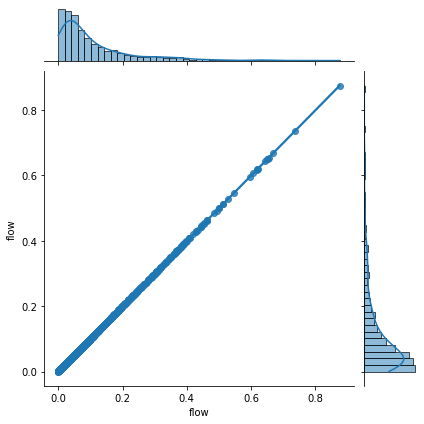

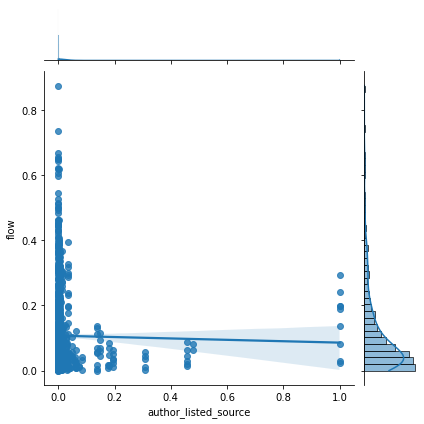

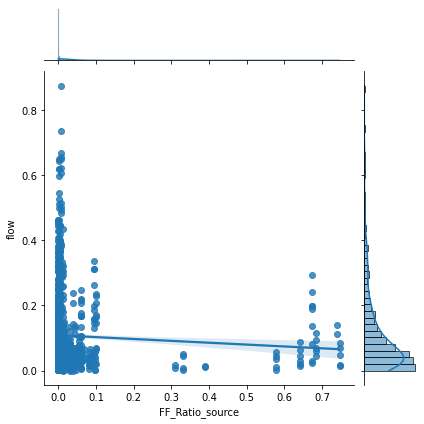

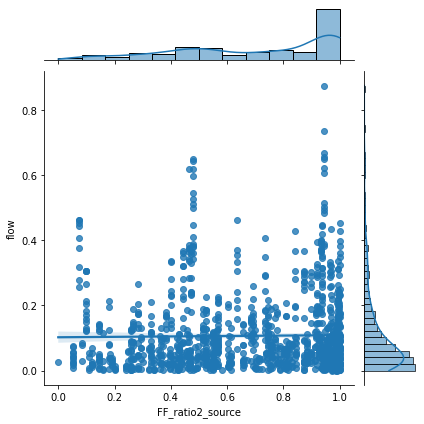

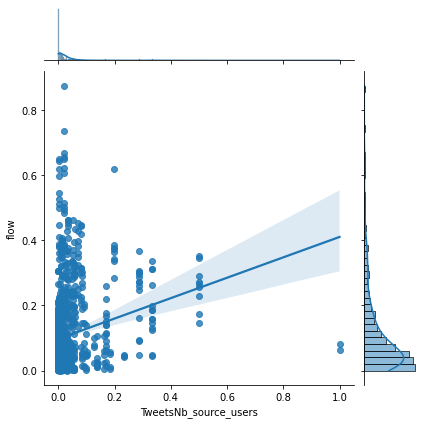

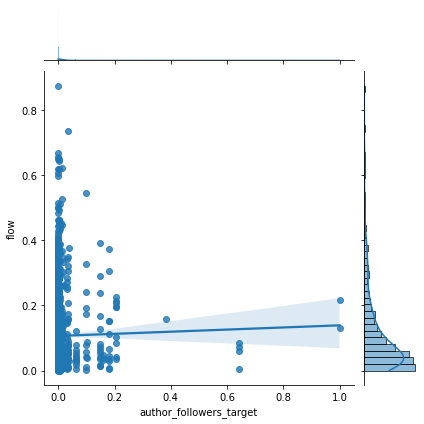

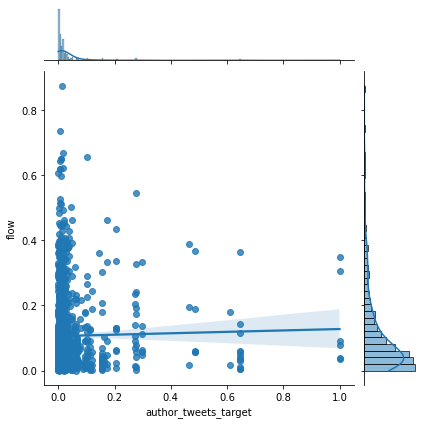

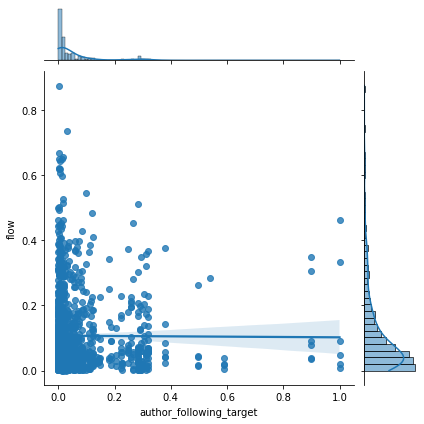

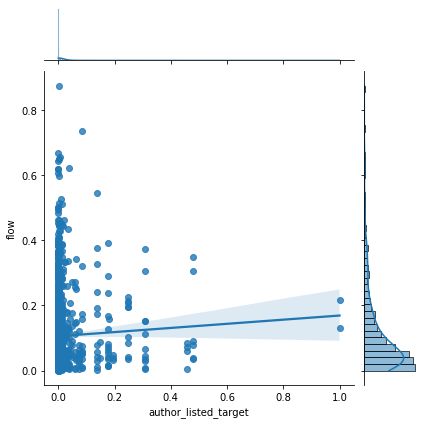

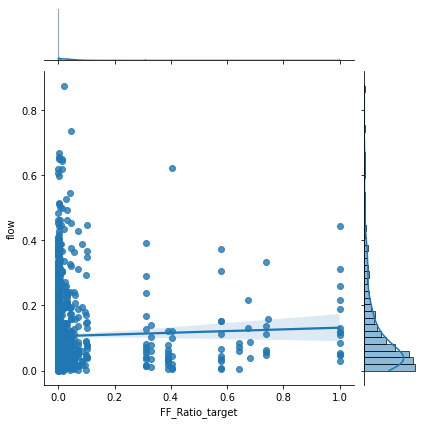

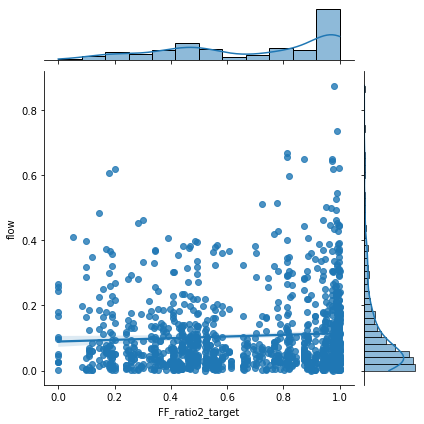

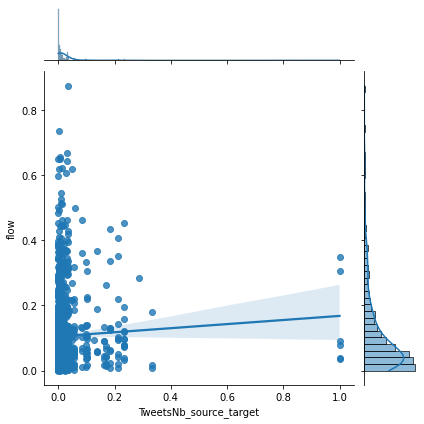

In [126]:
for i in range(len(columns_rfe)):
    sns.jointplot(data = dfs_sample, x = visualisation_features[i] , y = 'flow', kind="reg")

ValueError: Could not interpret value `TweetsNb_target` for parameter `x`

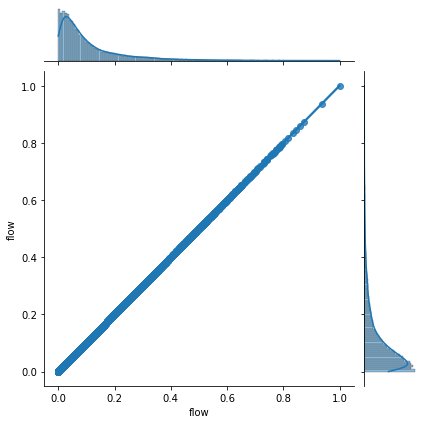

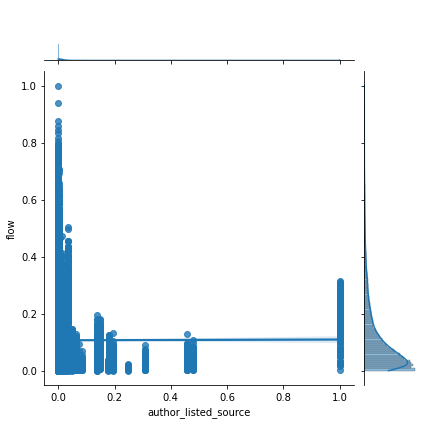

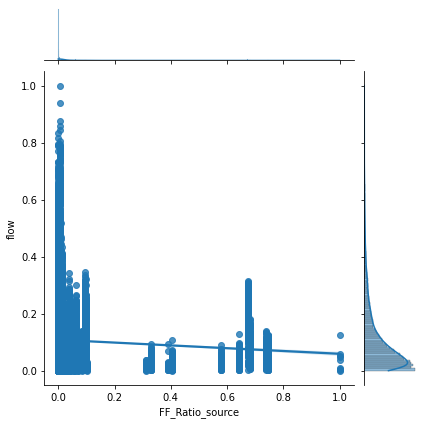

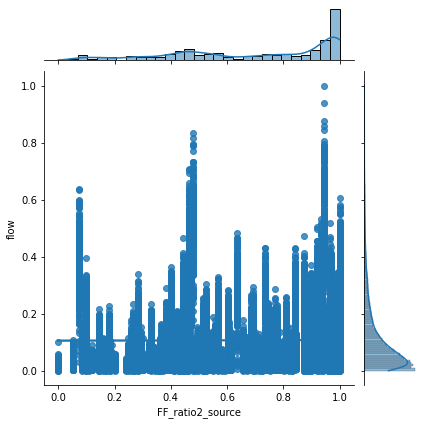

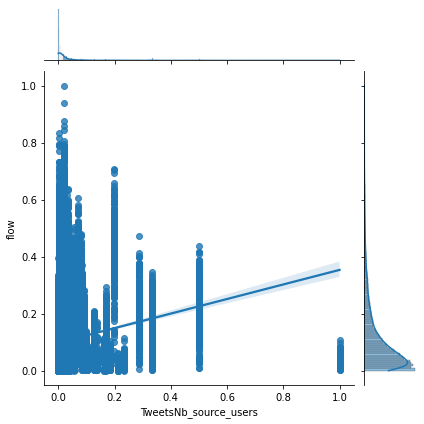

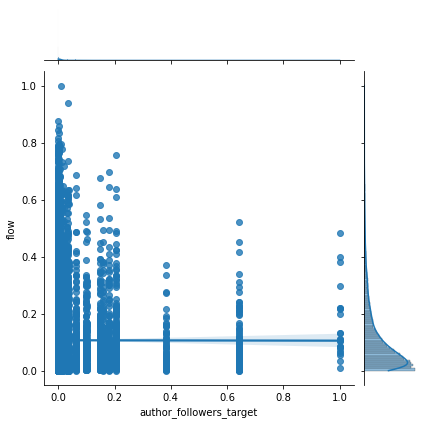

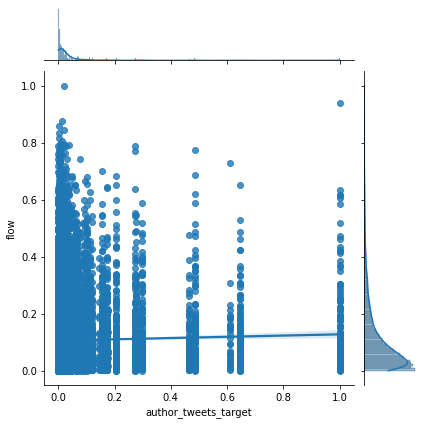

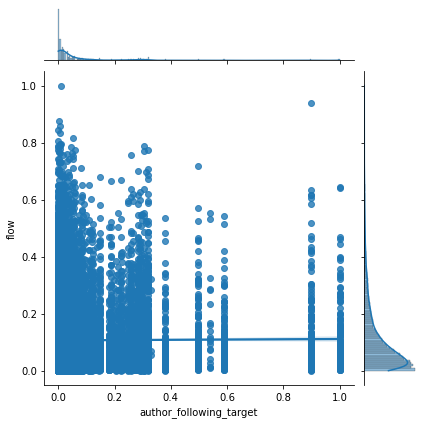

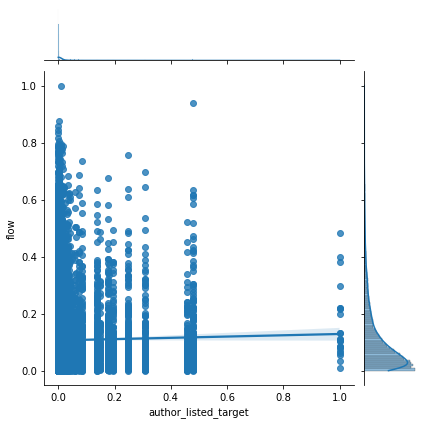

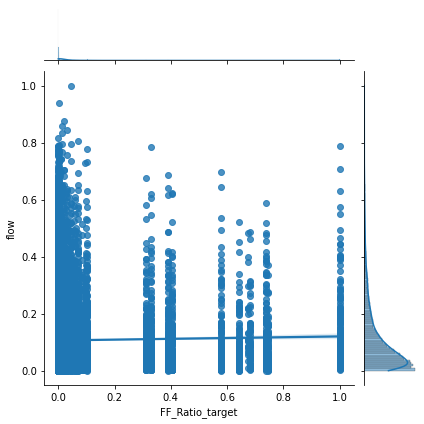

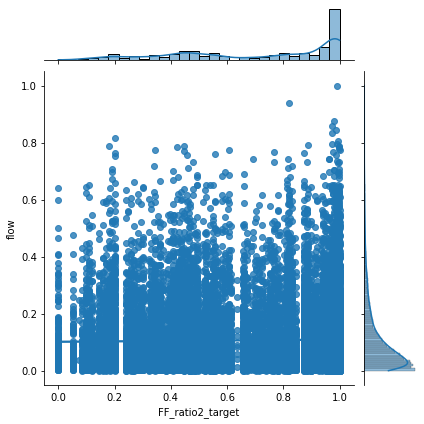

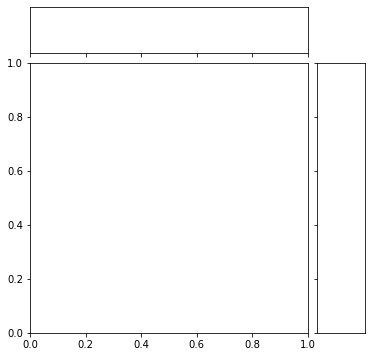

In [127]:

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    sns.jointplot(data = df, x = columns_rfe[i] , y = 'flow', kind="reg")


In [ ]:

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    #sbplt.hist(df[columns_rfe_2].iloc[i].values, range = [0,200], bins = 20)
    sns.jointplot(data = dfs, x = columns_rfe[i] , y = 'flow', kind="reg")

   # sns.set_title(df.index[i])
    
#fig.tight_layout()

#fig.text(0.4,0, "Movie length in minutes")
#fig.text(0,0.6, "Number of movies", rotation = 90)

In [ ]:
# Write your code to make 4x4 panel here

#fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    #sbplt.hist(df[columns_rfe_2].iloc[i].values, range = [0,200], bins = 20)
    sns.jointplot(data = df, x = columns_rfe[i] , y = 'flow', kind="reg")

   # sns.set_title(df.index[i])
    
#fig.tight_layout()

#fig.text(0.4,0, "Movie length in minutes")
#fig.text(0,0.6, "Number of movies", rotation = 90)